<a href="https://colab.research.google.com/github/Dong-Gi-Kang/Tools/blob/master/Birch_Murnaghan_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitted parameters = [-157.34536767    0.95156458   -0.77346289   99.13256007]


Text(0, 0.5, 'Energy')

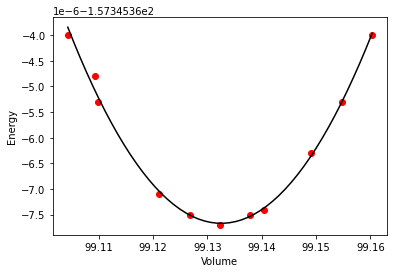

In [10]:
from scipy.optimize import leastsq
import numpy as np

vols = np.array([99.160335, 99.154735, 99.149136, 99.140469, 99.137937, 99.132338, 99.12674, 99.121141, 99.109408, 99.109944, 99.104346])
energies = np.array([-157.345364, -157.3453653, -157.3453663, -157.3453674, -157.3453675, -157.3453677, -157.3453675, -157.3453671, -157.3453648, -157.3453653, -157.345364])

def Murnaghan(parameters, vol):
    'From Phys. Rev. B 28, 5480 (1983)'
    E0, B0, BP, V0 = parameters

    E = E0 + B0 * vol / BP * (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.0)

    return E

def objective(pars, y, x):
    #we will minimize this function
    err =  y - Murnaghan(pars, x)
    return err

#x0 = [ -78.687630000, 136.213305692331, -1.42734268297441, 47.60529] #initial guess of parameters
#x0 = [-78.68763231,   0.85859947,  -0.91380741,  47.60533506]
x0 = [-78.6876323,    0.8590022,   -0.92303721,  47.60533033]   #final

plsq = leastsq(objective, x0, args=(energies, vols))

print ('Fitted parameters = {0}'.format(plsq[0]))

import matplotlib.pyplot as plt
plt.plot(vols,energies, 'ro')

#plot the fitted curve on top
x = np.linspace(min(vols), max(vols), 50)
y = Murnaghan(plsq[0], x)
plt.plot(x, y, 'k-')
plt.xlabel('Volume')
plt.ylabel('Energy')
#plt.savefig('images/nonlinear-curve-fitting.png')